In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch


In [6]:
# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


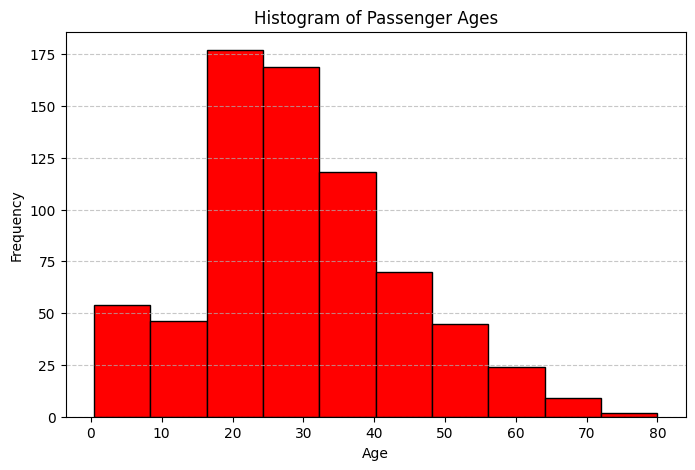

In [15]:
# Drop missing ages
age_data = df['Age'].dropna()

# Plot histogram of Age
plt.figure(figsize=(8, 5))
plt.hist(age_data, bins=10, color='red', edgecolor='black')
plt.title('Histogram of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

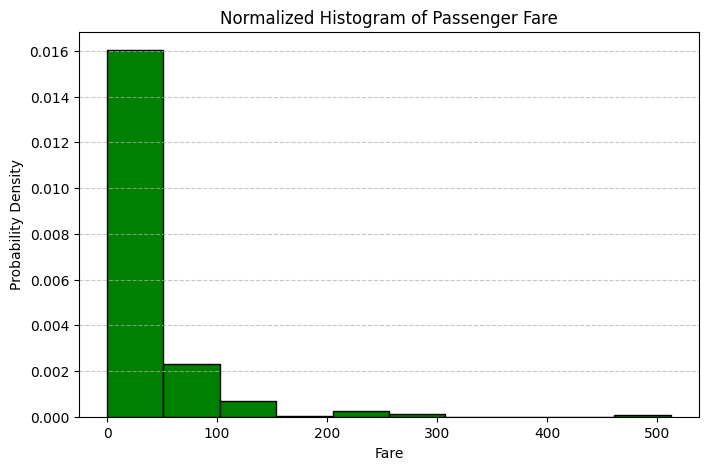

In [14]:
# Drop missing fare values (if any)
fare_data = df['Fare'].dropna()

# Plot normalized histogram (density=True)
plt.figure(figsize=(8, 5))
plt.hist(fare_data, bins=10, density=True, color='green', edgecolor='black')
plt.title('Normalized Histogram of Passenger Fare')
plt.xlabel('Fare')
plt.ylabel('Probability Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

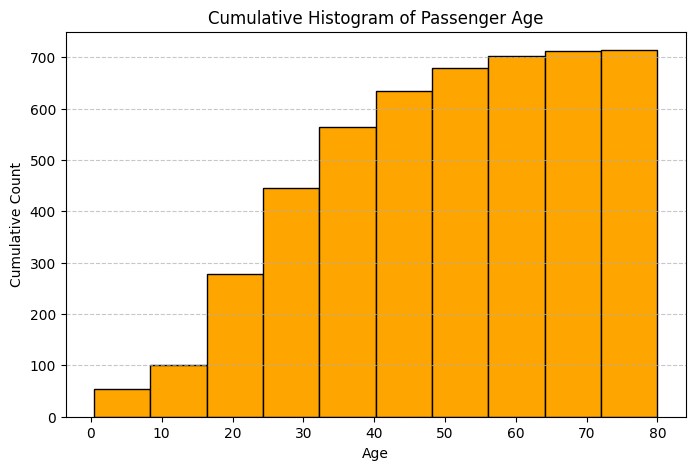

In [9]:
# Drop missing age values
age_data = df['Age'].dropna()

# Plot cumulative histogram
plt.figure(figsize=(8, 5))
plt.hist(age_data, bins=10, cumulative=True, color='orange', edgecolor='black')
plt.title('Cumulative Histogram of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Cumulative Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

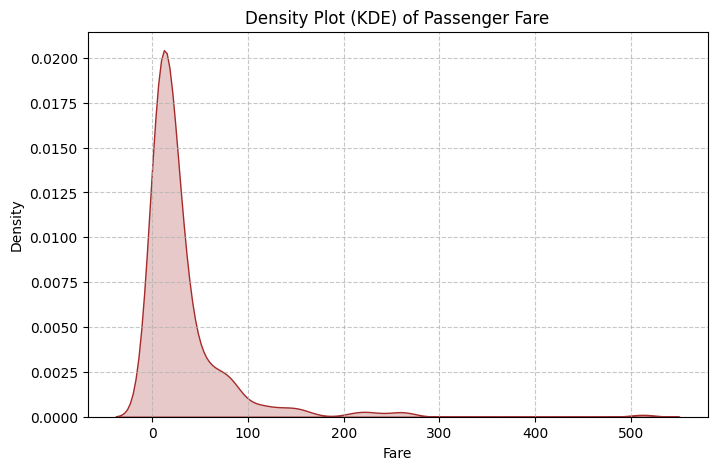

In [13]:
# Drop missing Fare values
fare_data = df['Fare'].dropna()

# KDE plot with seaborn
plt.figure(figsize=(8, 5))
sns.kdeplot(fare_data, fill=True, color='brown')
plt.title('Density Plot (KDE) of Passenger Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

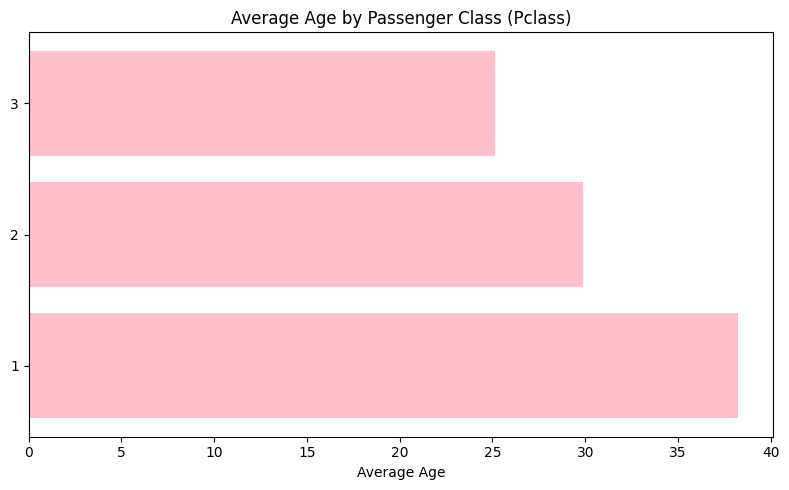

In [12]:
# Calculate average age by Pclass
avg_age_by_class = df.groupby('Pclass')['Age'].mean()

categories = avg_age_by_class.index.astype(str).tolist()
average_ages = avg_age_by_class.values

plt.figure(figsize=(8, 5))
plt.barh(categories, average_ages, color='pink')
plt.xlabel('Average Age')
plt.title('Average Age by Passenger Class (Pclass)')
plt.tight_layout()
plt.show()

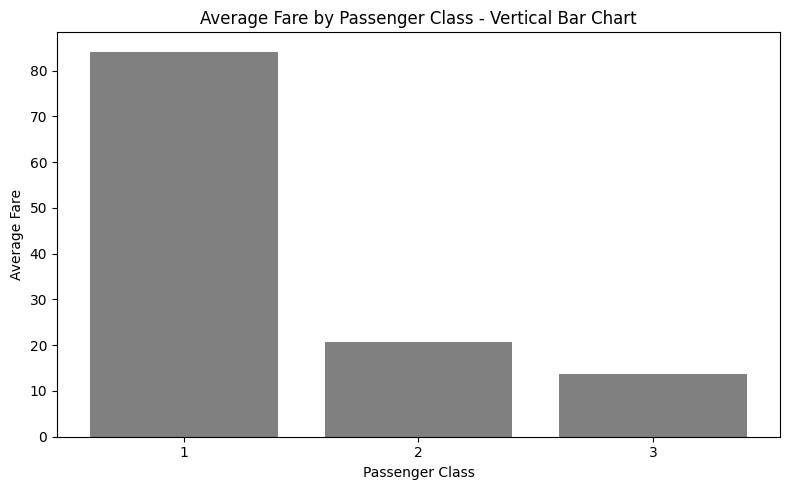

In [16]:
# Calculate average Fare by Pclass
avg_fare_by_class = df.groupby('Pclass')['Fare'].mean().sort_index()
categories = avg_fare_by_class.index.astype(str).tolist()
average_scores = avg_fare_by_class.values

plt.figure(figsize=(8, 5))
plt.bar(categories, average_scores, color='grey')
plt.ylabel('Average Fare')
plt.xlabel('Passenger Class')
plt.title('Average Fare by Passenger Class - Vertical Bar Chart')
plt.tight_layout()
plt.show()


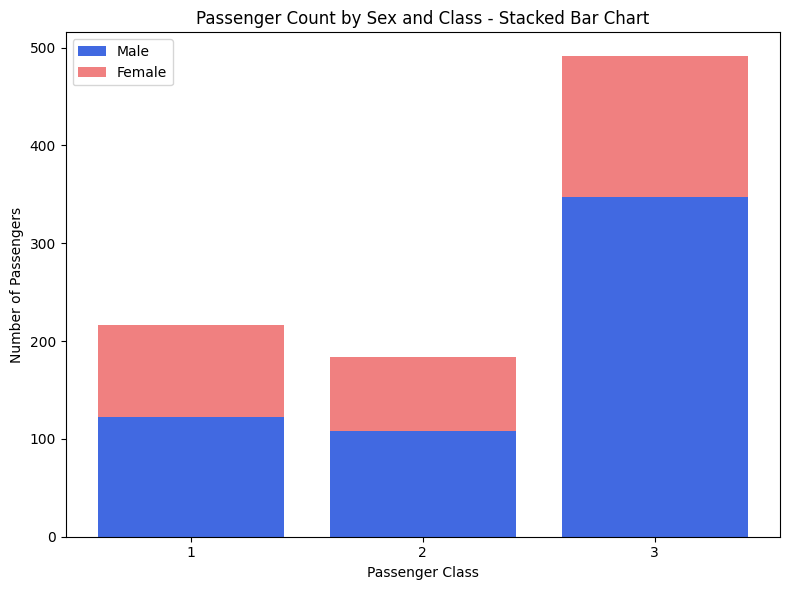

In [17]:
# Count passengers by Sex and Pclass
counts = df.groupby(['Sex', 'Pclass']).size().unstack(fill_value=0)

# Prepare data for stacked bar
males = counts.loc['male']
females = counts.loc['female']

x = counts.columns.astype(str)  # ['1', '2', '3']

plt.figure(figsize=(8, 6))
plt.bar(x, males, label='Male', color='royalblue')
plt.bar(x, females, bottom=males, label='Female', color='lightcoral')

plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Passenger Count by Sex and Class - Stacked Bar Chart')
plt.legend()
plt.tight_layout()
plt.show()

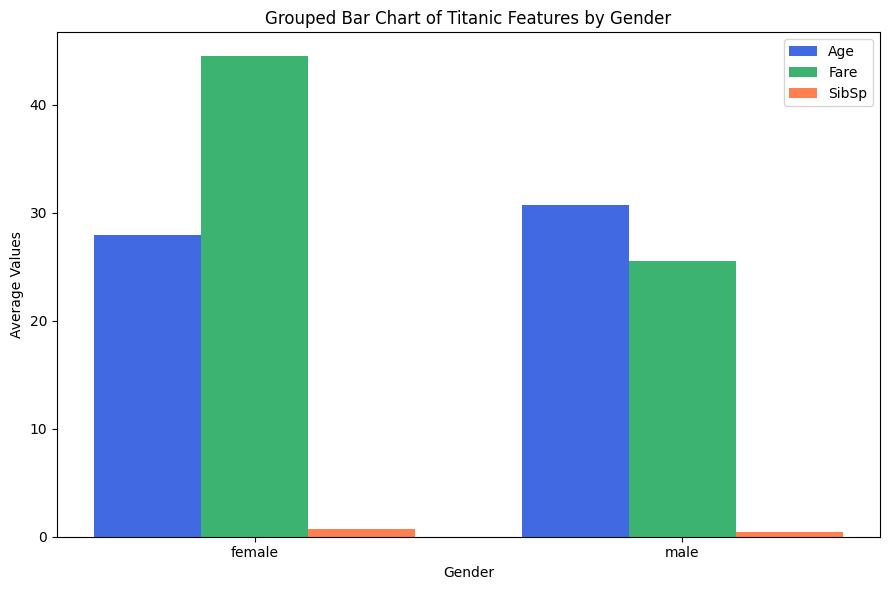

In [18]:

# Group and calculate averages by Sex
grouped = df.groupby('Sex')[['Age', 'Fare', 'SibSp']].mean().dropna()

genders = grouped.index.tolist()
age = grouped['Age'].values
fare = grouped['Fare'].values
sibsp = grouped['SibSp'].values

x = np.arange(len(genders))
width = 0.25

plt.figure(figsize=(9, 6))
plt.bar(x - width, age, width, label='Age', color='royalblue')
plt.bar(x, fare, width, label='Fare', color='mediumseagreen')
plt.bar(x + width, sibsp, width, label='SibSp', color='coral')

plt.xlabel('Gender')
plt.ylabel('Average Values')
plt.title('Grouped Bar Chart of Titanic Features by Gender')
plt.xticks(x, genders)
plt.legend()
plt.tight_layout()
plt.show()

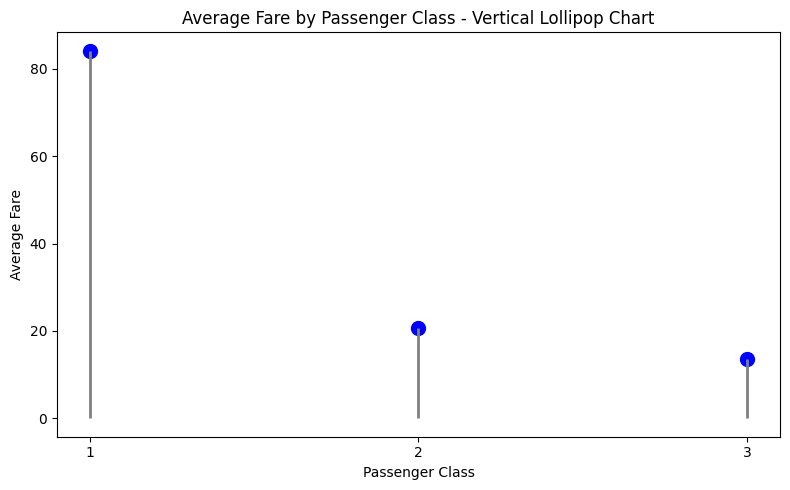

In [19]:
# Calculate average Fare by Pclass
avg_fare_by_class = df.groupby('Pclass')['Fare'].mean().sort_index()
categories = avg_fare_by_class.index.astype(str).tolist()
average_scores = avg_fare_by_class.values

plt.figure(figsize=(8, 5))
plt.vlines(x=categories, ymin=0, ymax=average_scores, color='gray', linewidth=2)
plt.scatter(categories, average_scores, color='blue', s=100)
plt.ylabel('Average Fare')
plt.xlabel('Passenger Class')
plt.title('Average Fare by Passenger Class - Vertical Lollipop Chart')
plt.tight_layout()
plt.show()

In [20]:
# Count values for 'Embarked' column
embarked_counts = df['Embarked'].value_counts()
labels = embarked_counts.index
sizes = embarked_counts.values

print("embarked_counts")
print(embarked_counts)
print("\nlabels")
print(labels)
print("\nsizes")
print(sizes)

embarked_counts
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

labels
Index(['S', 'C', 'Q'], dtype='object', name='Embarked')

sizes
[644 168  77]


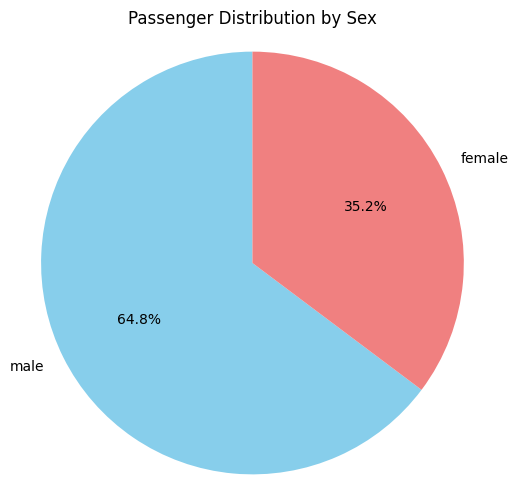

In [21]:
# Count passengers by sex
sex_counts = df['Sex'].value_counts()
labels = sex_counts.index
sizes = sex_counts.values

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Passenger Distribution by Sex')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular.
plt.show()

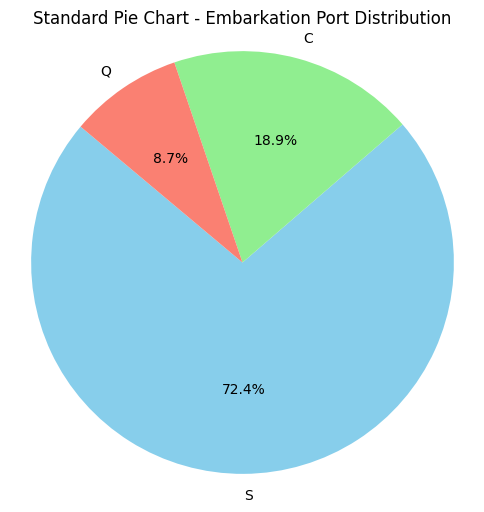

In [22]:
# Count values for 'Embarked'
embarked_counts = df['Embarked'].value_counts()
labels = embarked_counts.index
sizes = embarked_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Standard Pie Chart - Embarkation Port Distribution')
plt.axis('equal')  # Equal aspect ratio makes the pie circular
plt.show()

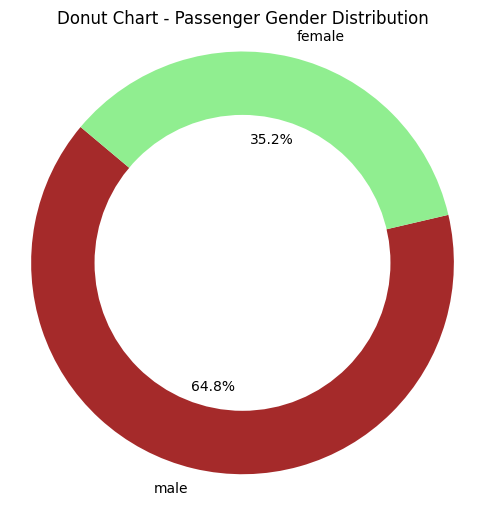

In [24]:
# Count passengers by sex
sex_counts = df['Sex'].value_counts()
labels = sex_counts.index
sizes = sex_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['brown', 'lightgreen'])

# Draw center circle to create donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Donut Chart - Passenger Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular.
plt.show()

[0.1, 0]


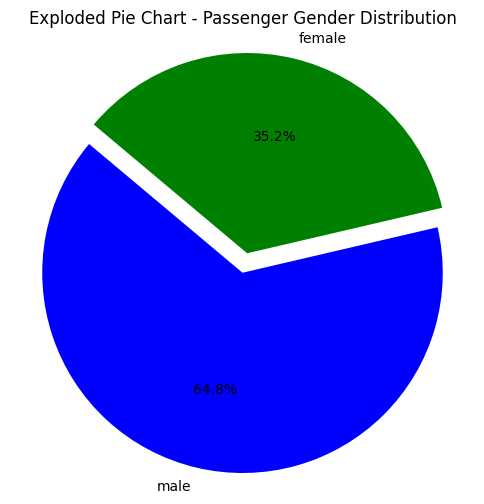

In [26]:
# Count passengers by sex
sex_counts = df['Sex'].value_counts()
labels = sex_counts.index
sizes = sex_counts.values

# Explode first slice (e.g., 'male') by 0.1, keep others at 0
explode = [0.1 if i == 0 else 0 for i in range(len(sizes))]
print(explode)  # Output: [0.1, 0]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, startangle=140, colors=['blue', 'green'])
plt.title('Exploded Pie Chart - Passenger Gender Distribution')
plt.axis('equal')
plt.show()

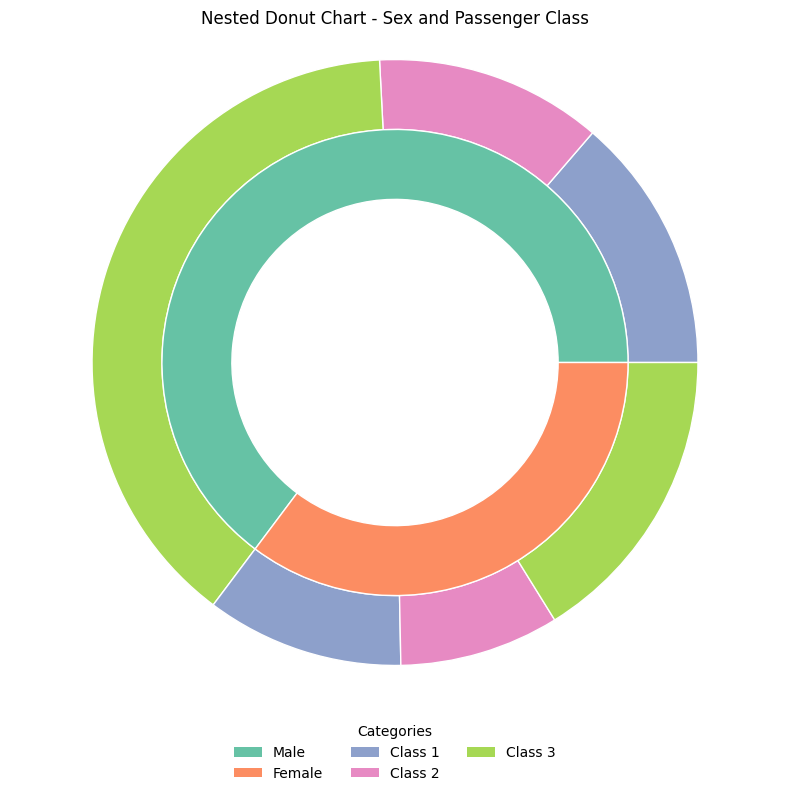

In [27]:
# Count Sex distribution (inner ring)
sex_counts = df['Sex'].value_counts()
inner_labels = sex_counts.index.tolist()
inner_sizes = sex_counts.values.tolist()
inner_colors = ['#66c2a5', '#fc8d62']  # custom colors for Sex

# Outer ring: Pclass distribution by Sex
outer_labels = []
outer_sizes = []
outer_colors = []

# Colors for Pclass categories
pclass_colors = {1: '#8da0cb', 2: '#e78ac3', 3: '#a6d854'}

for sex in inner_labels:
    pclass_counts = df[df['Sex'] == sex]['Pclass'].value_counts()
    for pclass in [1, 2, 3]:
        count = pclass_counts.get(pclass, 0)
        outer_labels.append(f'{sex} - Class {pclass}')
        outer_sizes.append(count)
        outer_colors.append(pclass_colors[pclass])

# Plot nested donut chart
fig, ax = plt.subplots(figsize=(8, 8))

# Outer ring (Pclass by Sex)
ax.pie(outer_sizes,
       radius=1.3,
       labels=None,
       colors=outer_colors,
       wedgeprops=dict(width=0.3, edgecolor='white'))

# Inner ring (Sex)
ax.pie(inner_sizes,
       radius=1,
       labels=None,
       colors=inner_colors,
       wedgeprops=dict(width=0.3, edgecolor='white'),
       labeldistance=0.7)

# Legend
legend_elements = [
    Patch(facecolor='#66c2a5', label='Male'),
    Patch(facecolor='#fc8d62', label='Female'),
    Patch(facecolor='#8da0cb', label='Class 1'),
    Patch(facecolor='#e78ac3', label='Class 2'),
    Patch(facecolor='#a6d854', label='Class 3'),
]

plt.legend(handles=legend_elements,
           title='Categories',
           loc='lower center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=3,
           frameon=False)

plt.title('Nested Donut Chart - Sex and Passenger Class')
plt.axis('equal')
plt.tight_layout()
plt.show()

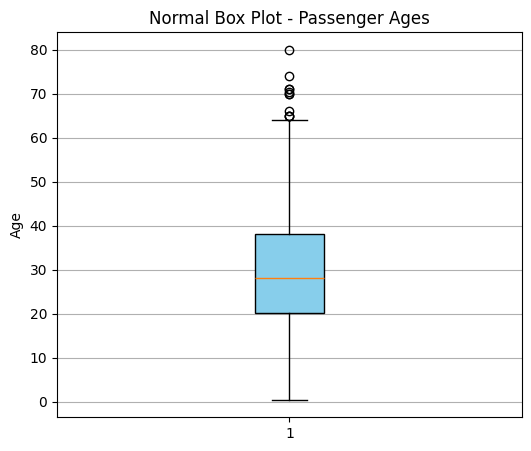

In [28]:
plt.figure(figsize=(6, 5))
plt.boxplot(df['Age'].dropna(),  # drop NaN for cleaner boxplot
            vert=True,
            patch_artist=True,
            boxprops=dict(facecolor='skyblue'))

plt.title('Normal Box Plot - Passenger Ages')
plt.ylabel('Age')
plt.grid(axis='y')
plt.show()

/tmp/ipython-input-882150565.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


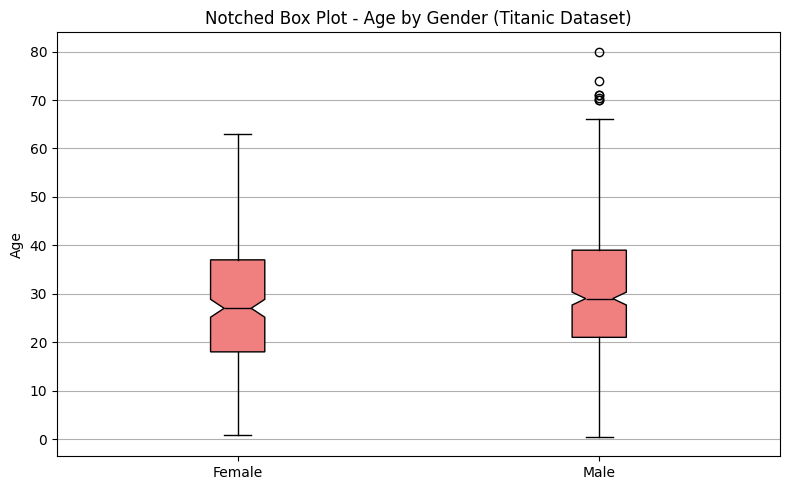

In [31]:
# Load Titanic dataset
df = sns.load_dataset('titanic')

# Drop rows with missing 'age' or 'sex'
df = df.dropna(subset=['age', 'sex'])

# Prepare data
female_ages = df[df['sex'] == 'female']['age']
male_ages = df[df['sex'] == 'male']['age']

# Create notched box plot
plt.figure(figsize=(8, 5))
plt.boxplot(
    [female_ages, male_ages],
    labels=['Female', 'Male'],
    notch=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightcoral'),
    medianprops=dict(color='black'),
)

plt.title('Notched Box Plot - Age by Gender (Titanic Dataset)')
plt.ylabel('Age')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


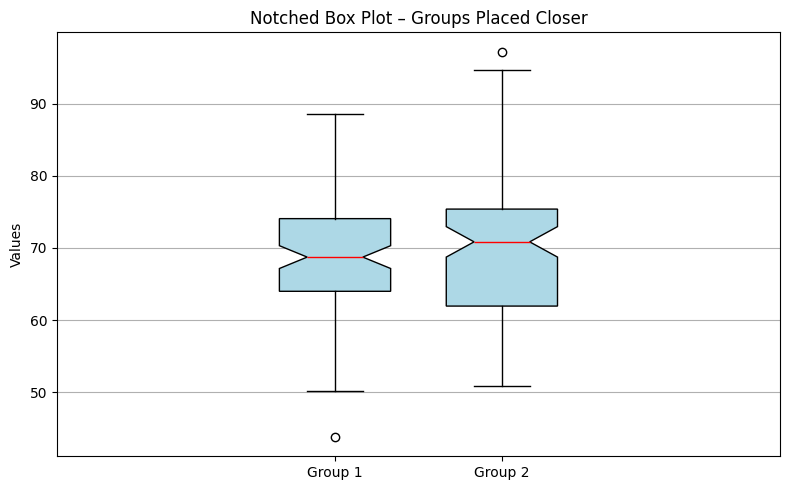

Are Group 1 and Group 2 identical?: False

Five Number Summary - Group 1:
{'Min': np.float64(43.80254895910255), 'Q1': np.float64(63.99094329503547), 'Median (Q2)': np.float64(68.73043708220288), 'Q3': np.float64(74.05952052012063), 'Max': np.float64(88.52278184508938)}

Five Number Summary - Group 2:
{'Min': np.float64(50.812287847009586), 'Q1': np.float64(61.943394768424255), 'Median (Q2)': np.float64(70.84107169946834), 'Q3': np.float64(75.3817044766274), 'Max': np.float64(97.20169166589619)}


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate five-number summary
def five_number_summary(data):
    return {
        "Min": np.min(data),
        "Q1": np.percentile(data, 25),
        "Median (Q2)": np.median(data),
        "Q3": np.percentile(data, 75),
        "Max": np.max(data)
    }

# Generate two similar groups of data
np.random.seed(42)
group1 = np.random.normal(loc=70, scale=10, size=100)
group2 = np.random.normal(loc=70, scale=10, size=100)

# Create notched boxplot with boxes placed closer together
plt.figure(figsize=(8, 5))
plt.boxplot(
    [group1, group2],
    positions=[1.0, 1.3],
    widths=0.2,
    notch=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue'),
    medianprops=dict(color='red')
)

# Set manual x-axis labels
plt.xticks([1.0, 1.3], ['Group 1', 'Group 2'])
plt.title('Notched Box Plot – Groups Placed Closer')
plt.ylabel('Values')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Print comparison and summaries
summary1 = five_number_summary(group1)
summary2 = five_number_summary(group2)

print("Are Group 1 and Group 2 identical?:", np.array_equal(group1, group2))
print("\nFive Number Summary - Group 1:")
print(summary1)
print("\nFive Number Summary - Group 2:")
print(summary2)

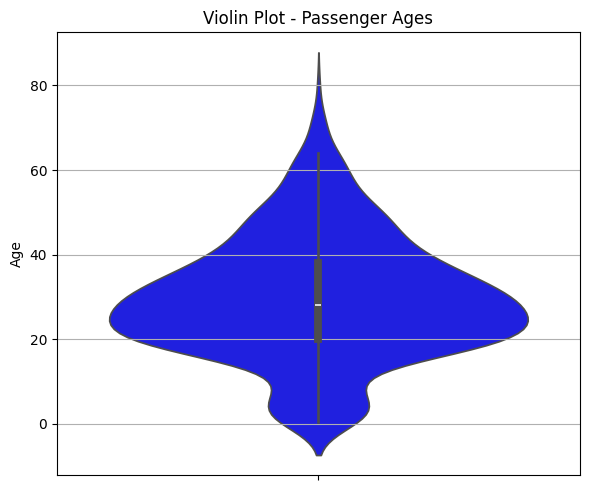

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Drop missing values in Age column for clean plotting
df_age = df.dropna(subset=['age'])

# Create violin plot
plt.figure(figsize=(6, 5))
sns.violinplot(y=df_age['age'], inner='box', color='blue')
plt.title('Violin Plot - Passenger Ages')
plt.ylabel('Age')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

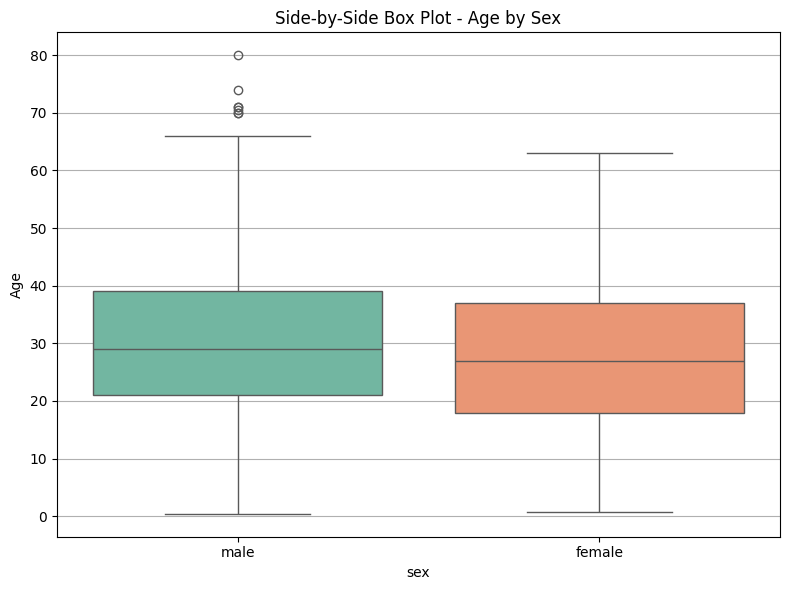

Median Age - Male: 29.0
Median Age - Female: 27.0


In [35]:
# Load Titanic dataset
df = sns.load_dataset('titanic')

# Drop rows with missing age
df_age = df.dropna(subset=['age'])

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', hue='sex', y='age', data=df_age, palette='Set2')
plt.title('Side-by-Side Box Plot - Age by Sex')
plt.ylabel('Age')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Median calculation
medians = df_age.groupby('sex')['age'].median()

# Print results
print(f"Median Age - Male: {medians['male']}")
print(f"Median Age - Female: {medians['female']}")